# Classification non supervisée: $K$-moyennes

Nous allons travailler sur les [Iris de Fisher](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Ce jeu de données est composé des mesures de 150 Iris répartis équitablement en 3 espèces : *Iris setosa*, *Iris virginica* et *Iris versicolor*.

Le jeu de données contient 4 variables exprimées en cm :
1. La longueur des sépales.
2. La largeur des sépales.
3. La longueur des pétales.
4. La largeur des pétales.


## Préambule

### Chargement des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn import datasets

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.cluster import adjusted_rand_score

### Importation du jeu de données

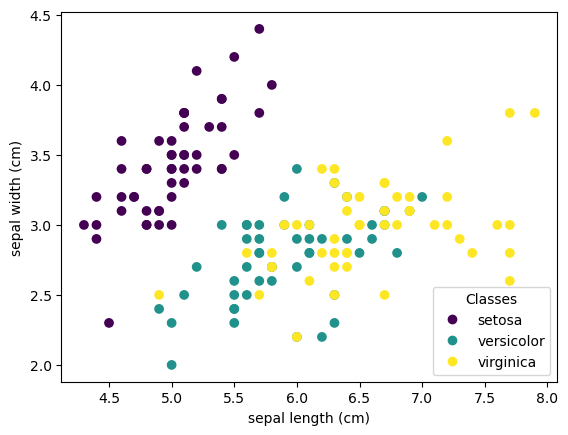

In [2]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris() 

#https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Étude préalable du jeu de données

In [3]:
# iris as dataframe with categorical target
df_iris = sns.load_dataset('iris')

df_iris['species'] = pd.Categorical(df_iris['species'])

#### Étude univariée

In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


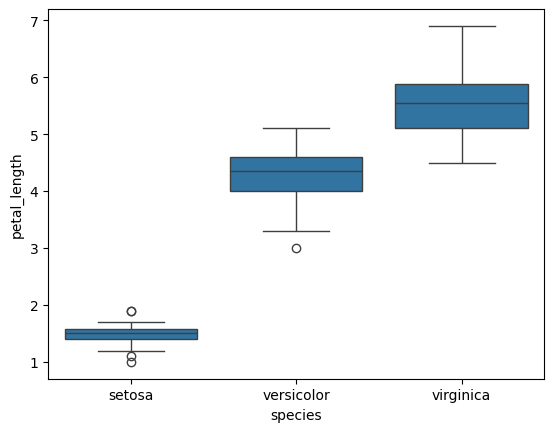

In [5]:
sns.boxplot(x='species', y='petal_length', data = df_iris)
plt.show()

#### Étude bivariée

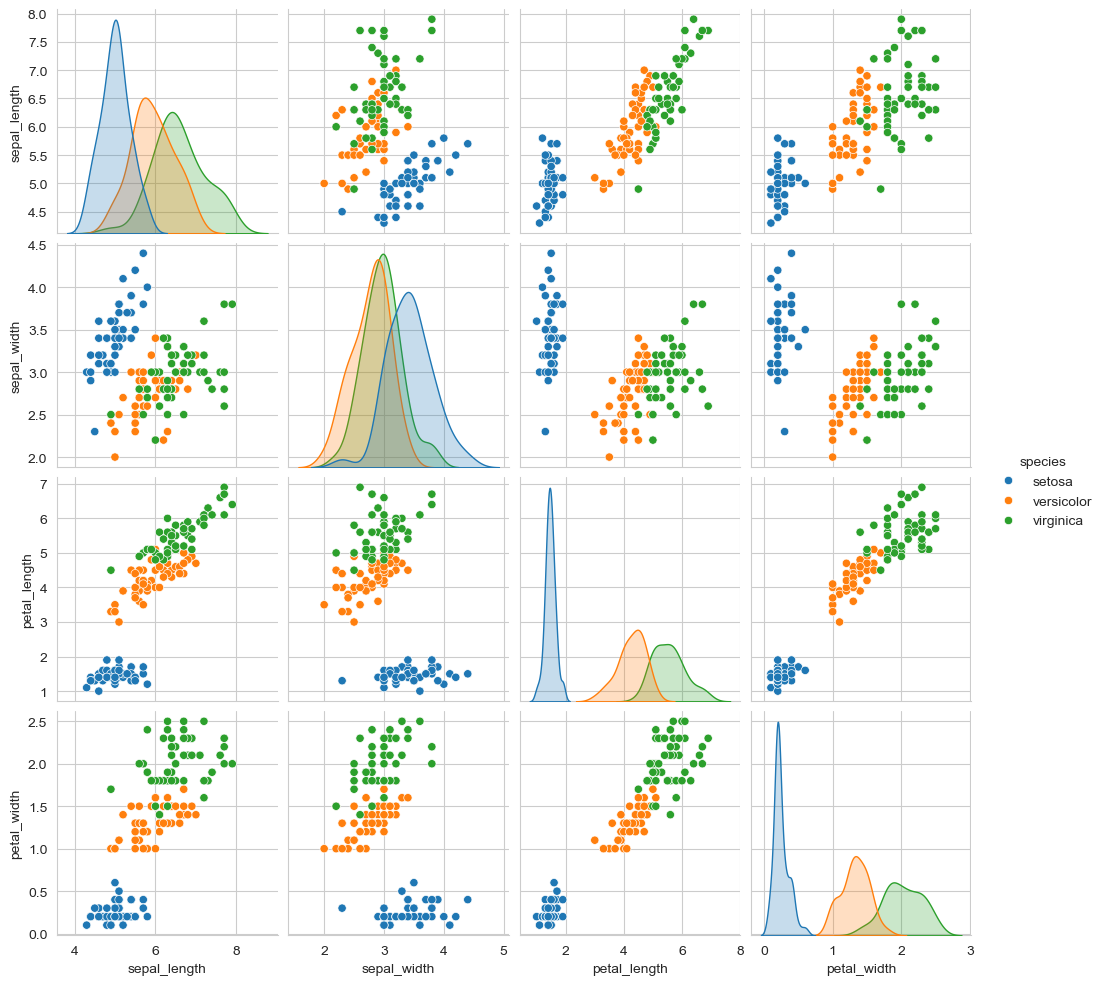

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df_iris,hue = 'species', height=2.5);
plt.show()

/tmp/ipykernel_3255/1309261780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_iris = df_iris.corr()


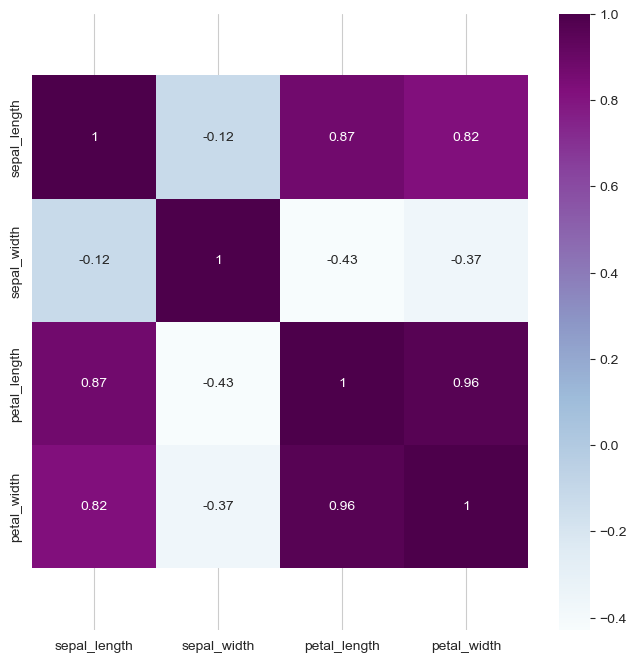

In [7]:
corr_iris = df_iris.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr_iris, cmap='BuPu', annot=True)
bottom, top = ax.get_ylim() # fix for a correct display with matplotlib 
ax.set_ylim(bottom + 0.5, top - 0.5)  # fix for display with matplotlib 
plt.show()

## $K$-moyennes

Les pricinpes de l'algorithme des $K$-moyennes ($K$-means) sont rappelés [ici](https://fr.wikipedia.org/wiki/K-moyennes).

**Question.** Que permet de visualiser le code suivant ?

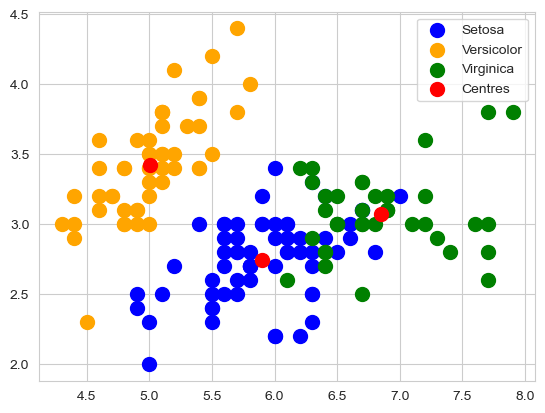

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_hat = kmeans.fit_predict(iris.data)

plt.scatter(iris.data[y_hat == 0, 0], iris.data[y_hat == 0, 1], s = 100, c = 'blue', label = 'Setosa')
plt.scatter(iris.data[y_hat == 1, 0], iris.data[y_hat == 1, 1], s = 100, c = 'orange', label = 'Versicolor')
plt.scatter(iris.data[y_hat == 2, 0], iris.data[y_hat == 2, 1], s = 100, c = 'green', label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centres')

plt.legend()
plt.show()

**Questions.** Que fait le code suivant ? Que représente la variable `wcss` ?

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
wcss = []
y_hat = []

for k in range(0, 9):
    kmeans = KMeans(n_clusters = k+1, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    y_hat.append(kmeans.fit_predict(iris.data))
    wcss.append(kmeans.inertia_)

**Exercice.** Tracer le critère optimisé en fonction de $K$.

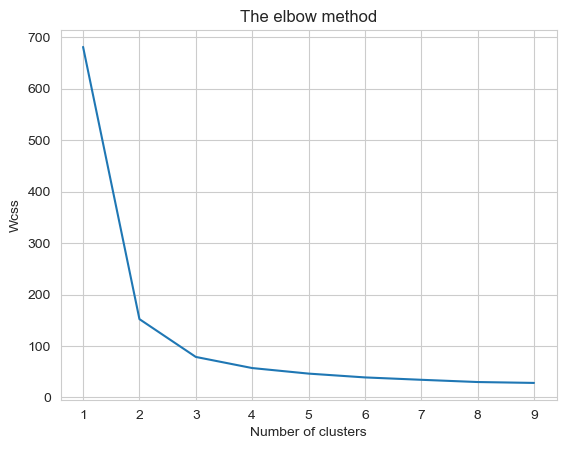

In [10]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

**Exercice.** Connaissant les étiquettes, tracer le score ARI en fonction de $K$. Comment peut-on utiliser ce critère pour choisir $K$ ?

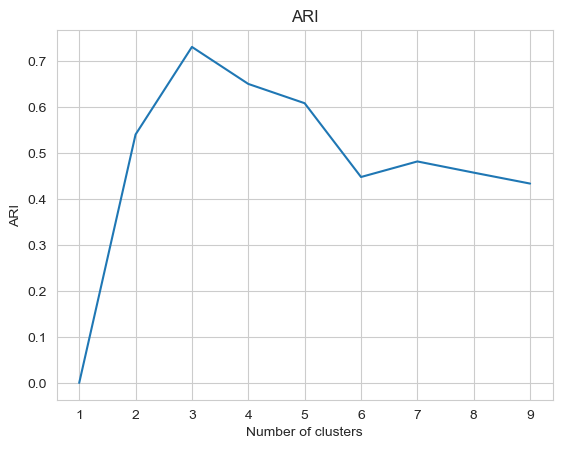

In [11]:
ari = []

for k in range(0, 9):
    ari.append(adjusted_rand_score(iris.target, y_hat[k]))
    
plt.plot(range(1, 10), ari)
plt.title('ARI')
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

**Exercice.** Proposer une alternative en faisant l'hypothèse que les étiquettes sont inconnues. On pourra utiliser la notion de réplication d'une même expérience pour chaque $K$.

In [12]:
pass

**Exercice.** Mettre en place une procédure d'apprentissage rigoureuse pour sélectionner le nombre $K$ optimal de clusters et pour donner un score ARI de généralisation. La procédure devra être réalisée sans utiliser les étiquettes.

In [13]:
pass

**Question.** Quels autres hyper-paramètres peuvent-être sélectionnés dans cette procédure ?

**Exercice.** Réitérer cette procédure avec une [classification hiérarchique](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

**Ouverture.** Pour finir, vous pouvez regarder cette [perspective intéressante](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py) des algorithmes de classification réalisée sur `scikit-learn`.